In [1]:
#!pip install torchvision

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [3]:
from transformers import pipeline

In [4]:
sam_pipe = pipeline("mask-generation",
    "Zigeng/SlimSAM-uniform-77")

In [5]:
from PIL import Image

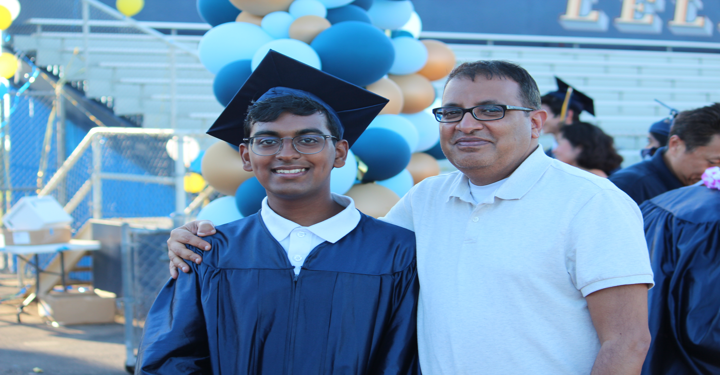

In [6]:
raw_image = Image.open('adi_grad.jpeg')
raw_image.resize((720, 375))

In [7]:
#output = sam_pipe(raw_image, points_per_batch=32)

In [8]:
from transformers import SamModel, SamProcessor

In [9]:
model = SamModel.from_pretrained(
    "Zigeng/SlimSAM-uniform-77")

processor = SamProcessor.from_pretrained(
    "Zigeng/SlimSAM-uniform-77")

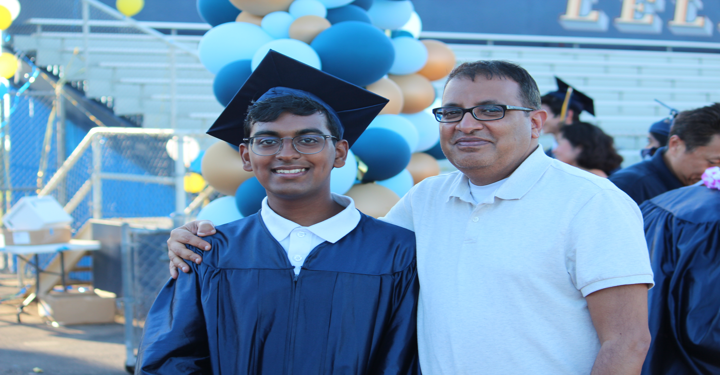

In [10]:
raw_image.resize((720, 375))

In [11]:
input_points = [[[1900, 1500]]]

In [12]:
import torch
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt").to(torch.float32)

In [13]:
with torch.no_grad():
    outputs = model(**inputs)

In [14]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [15]:
len(predicted_masks)

1

In [16]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

torch.Size([1, 3, 3456, 5184])

In [17]:
outputs.iou_scores

tensor([[[0.8894, 0.9206, 0.8979]]])

In [18]:
from helpersam import show_mask_on_image

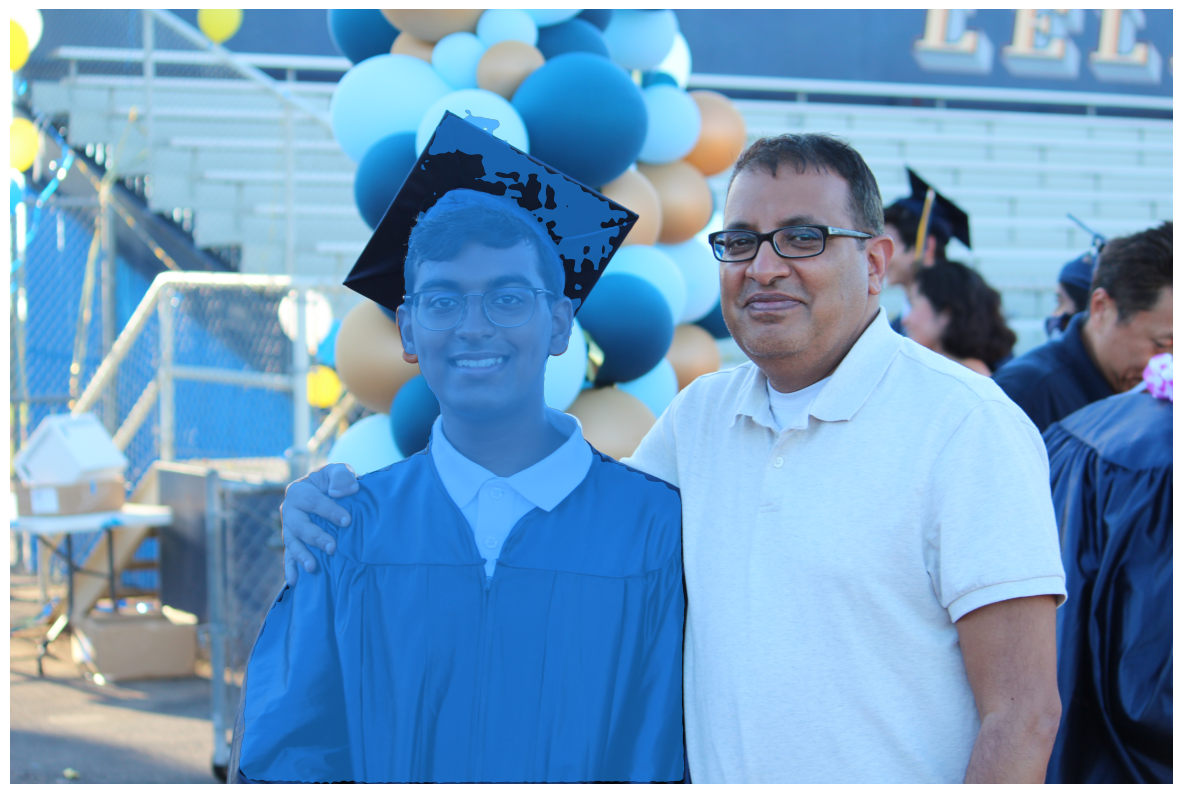

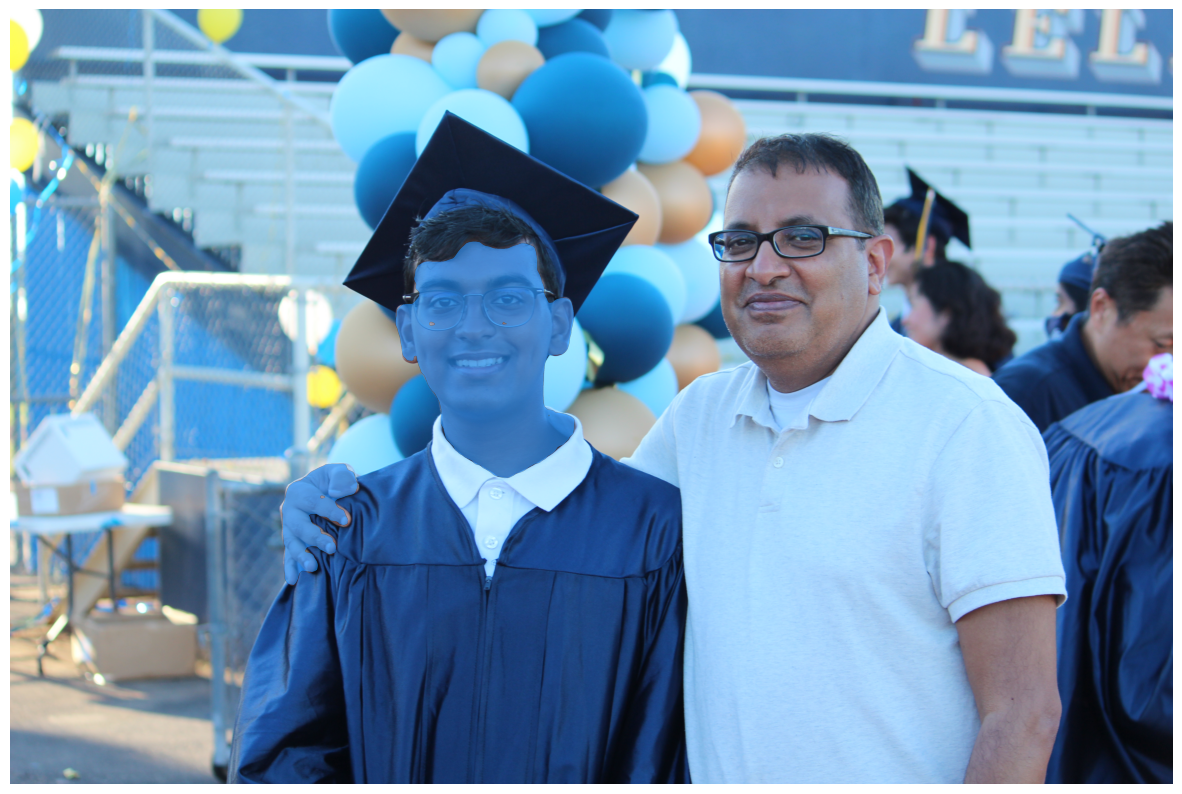

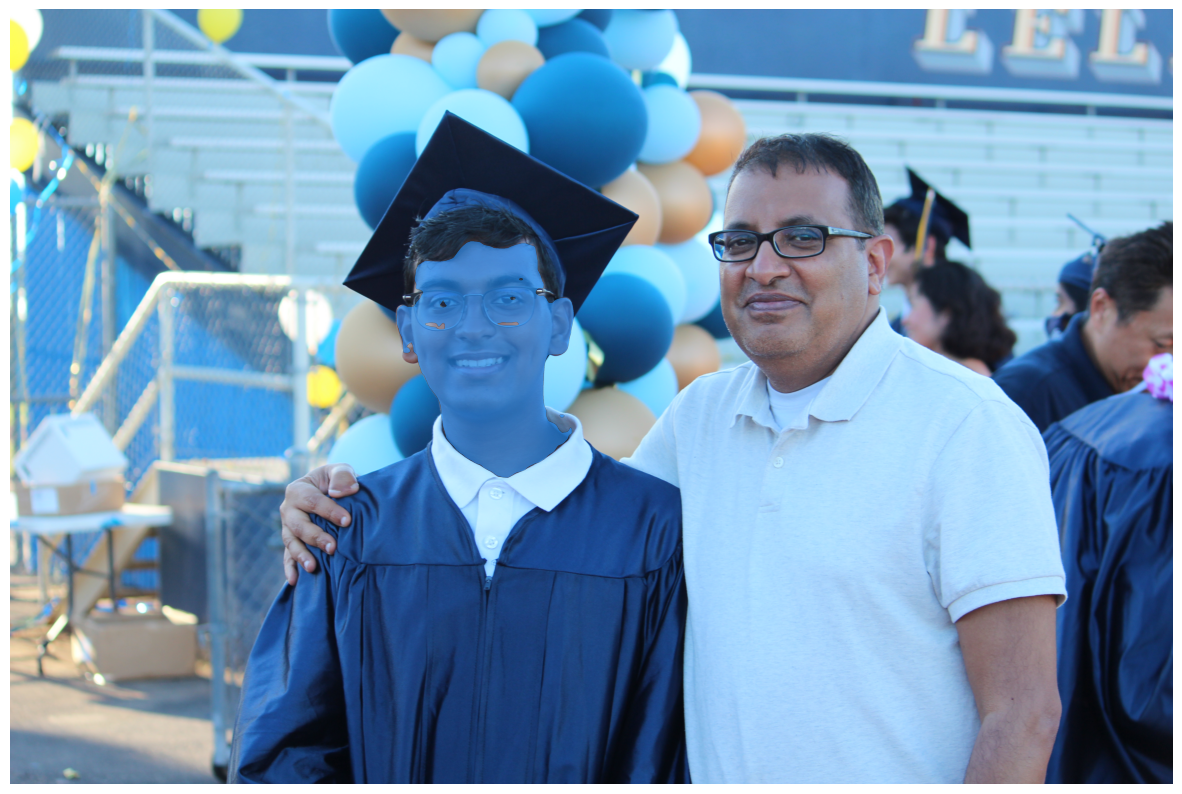

In [19]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])